## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
# 確認硬體資源
!nvidia-smi

Mon Feb 28 06:34:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
from tensorflow import keras

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
# 資料前處理
def preproc_x(x, flatten=True):
    x = (x / 127.5) - 1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preproc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10):
    input_layer = keras.layers.Input(input_shape)

    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Dense(units=512, activation="relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.2)(x)

    x = keras.layers.Dense(units=512, activation="relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.2)(x)

    x = keras.layers.Dense(units=1024, activation="relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.2)(x)

    x = keras.layers.Dense(units=1024, activation="relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.2)(x)

    x = keras.layers.Dense(units=512, activation="relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.2)(x)

    x = keras.layers.Dense(units=512, activation="relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.2)(x)

    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
    
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 512)               0     

In [7]:
# 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
history = model.fit(x_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(x_test, y_test), 
                    shuffle=True, 
                    verbose=2)

Epoch 1/100
196/196 - 9s - loss: 1.9218 - accuracy: 0.3243 - val_loss: 1.6459 - val_accuracy: 0.4154 - 9s/epoch - 45ms/step
Epoch 2/100
196/196 - 3s - loss: 1.5941 - accuracy: 0.4270 - val_loss: 1.5652 - val_accuracy: 0.4472 - 3s/epoch - 16ms/step
Epoch 3/100
196/196 - 3s - loss: 1.4813 - accuracy: 0.4714 - val_loss: 1.4596 - val_accuracy: 0.4937 - 3s/epoch - 15ms/step
Epoch 4/100
196/196 - 3s - loss: 1.3961 - accuracy: 0.5016 - val_loss: 1.4459 - val_accuracy: 0.5018 - 3s/epoch - 16ms/step
Epoch 5/100
196/196 - 3s - loss: 1.3247 - accuracy: 0.5281 - val_loss: 1.3839 - val_accuracy: 0.5184 - 3s/epoch - 16ms/step
Epoch 6/100
196/196 - 3s - loss: 1.2664 - accuracy: 0.5475 - val_loss: 1.4001 - val_accuracy: 0.5117 - 3s/epoch - 15ms/step
Epoch 7/100
196/196 - 3s - loss: 1.2213 - accuracy: 0.5651 - val_loss: 1.3739 - val_accuracy: 0.5368 - 3s/epoch - 16ms/step
Epoch 8/100
196/196 - 3s - loss: 1.1701 - accuracy: 0.5861 - val_loss: 1.3504 - val_accuracy: 0.5283 - 3s/epoch - 15ms/step
Epoch 9/

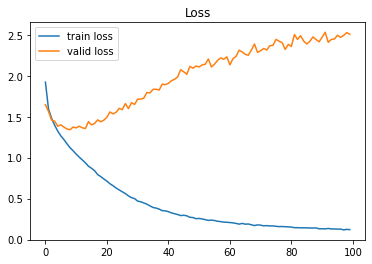

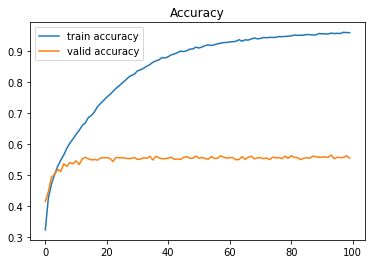

In [10]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.figure()
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.figure()
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()